In [1]:

import numpy as np
import matplotlib.pyplot as plt
import math
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Global parameters
g = 9.81           # gravitational acceleration (m/s^2)
dt = 0.001         # time step (s)
mass = 0.148       # mass of the baseball (kg)
x0 = 0.0           # initial x-position (m)
y0 = 0.76          # initial y-position (m)
v0 = 49.2          # initial speed (m/s)

def acceleration(pos,v, drag=False, C=0.0):
    """
    Compute the acceleration vector given the velocity.
    
    Parameters:
        v : array_like, shape(2,)
            Velocity vector [v_x, v_y].
        drag : bool
            If True, include drag acceleration.
        C : float
            Drag coefficient.
    
    Returns:
        a : numpy array, shape(2,)
            Acceleration vector [a_x, a_y].
    """
    if drag:
        a_x = - (C/mass) * v[0]
        a_y = - g - (C/mass) * v[1]
    else:
        a_x = 0.0
        a_y = - g
    return np.array([a_x, a_y])

def simulate_projectile_leapfrog(angle_deg, drag=False, C=0.0, dt=0.001, mass=0.148, v0=49.2):
    """

    Parameters:
        angle_deg : float
            Launch angle in degrees.
        drag : bool
            If True, include linear air resistance.
        C : float
            Drag coefficient (used if drag is True).
        dt : float
            Time step.
        mass : float
            Mass of the projectile.
        v0 : float
            Initial speed.
    
    Returns:
        t_arr, x_arr, y_arr, vx_arr, vy_arr : numpy arrays
            Arrays of time, x-position, y-position, x-velocity, and y-velocity until the projectile hits the ground.
    """
    # Convert angle to radians
    angle_rad = math.radians(angle_deg)
    
    # Initial state
    pos = np.array([x0, y0])
    vel = np.array([v0 * math.cos(angle_rad), v0 * math.sin(angle_rad)])
    
    # Compute initial acceleration
    a = acceleration(pos,vel, drag=drag, C=C)
    
    # Lists to store data
    t_list = [0.0]
    x_list = [pos[0]]
    y_list = [pos[1]]
    vx_list = [vel[0]]
    vy_list = [vel[1]]
    
    t = 0.0
    # Main integration loop until the ball hits the ground (y < 0)
    while pos[1] >= 0:
        # Update position: x_{n+1} = x_n + v_n dt + 0.5 a_n dt^2
        pos_new = pos + vel * dt + 0.5 * a * dt**2
        
        
        # Compute new acceleration using predicted velocity (drag depends on velocity)
        a_new = acceleration(pos_new,vel, drag=drag, C=C)
        
        # Update velocity: v_{n+1} = v_n + 0.5 (a_n + a_{n+1}) dt
        vel_new = vel + 0.5 * (a + a_new) * dt
        
        # Advance time
        t += dt
        
        # Store the data
        t_list.append(t)
        x_list.append(pos_new[0])
        y_list.append(pos_new[1])
        vx_list.append(vel_new[0])
        vy_list.append(vel_new[1])
        
        # Prepare for next step
        pos = pos_new
        vel = vel_new
        a = a_new
        
    return np.array(t_list), np.array(x_list), np.array(y_list), np.array(vx_list), np.array(vy_list)




## 1. No-Air-Resistance Simulation at 29°
We first simulate the projectile motion without air resistance for a 29° launch. The flight time and range are then printed.



In [2]:
#%% [code]
# Simulate without air resistance at 29°
angle = 29
t_no_drag, x_no_drag, y_no_drag, vx_no_drag, vy_no_drag = simulate_projectile_leapfrog(angle, drag=False, dt=dt, mass=mass, v0=v0)

flight_time_no_drag = t_no_drag[-1]
range_no_drag = x_no_drag[-1]

print("No-air-resistance simulation at 29°:")
print(f"Time of flight: {flight_time_no_drag:.3f} s")
print(f"Range: {range_no_drag:.3f} m")


No-air-resistance simulation at 29°:
Time of flight: 4.895 s
Range: 210.638 m




## 2. Phase-Space Plots for the 29° No-Drag Case
We now plot slices through phase space. The following figures display:
- \( (v_x, x) \)
- \( (v_y, y) \)
- \( (v_x, v_y) \)
- The trajectory \( (x, y) \)



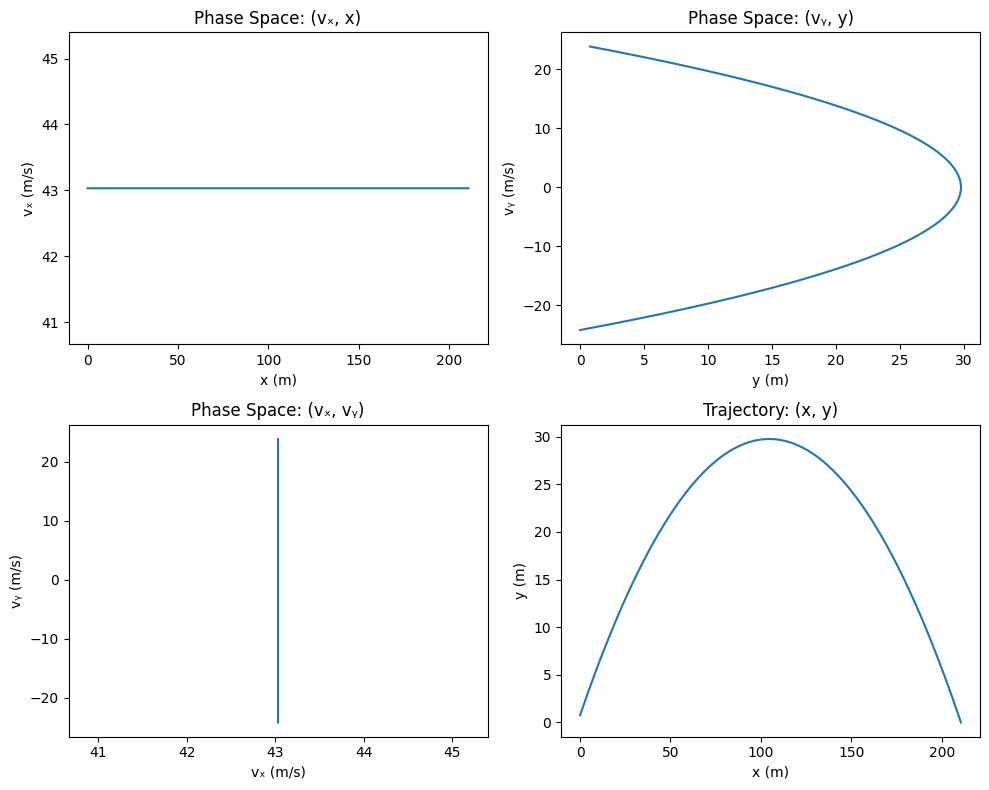

In [3]:
#%% [code]
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# (v_x, x)
axs[0, 0].plot(x_no_drag, vx_no_drag)
axs[0, 0].set_xlabel("x (m)")
axs[0, 0].set_ylabel("vₓ (m/s)")
axs[0, 0].set_title("Phase Space: (vₓ, x)")

# (v_y, y)
axs[0, 1].plot(y_no_drag, vy_no_drag)
axs[0, 1].set_xlabel("y (m)")
axs[0, 1].set_ylabel("vᵧ (m/s)")
axs[0, 1].set_title("Phase Space: (vᵧ, y)")

# (vₓ, vᵧ)
axs[1, 0].plot(vx_no_drag, vy_no_drag)
axs[1, 0].set_xlabel("vₓ (m/s)")
axs[1, 0].set_ylabel("vᵧ (m/s)")
axs[1, 0].set_title("Phase Space: (vₓ, vᵧ)")

# Trajectory (x, y)
axs[1, 1].plot(x_no_drag, y_no_drag)
axs[1, 1].set_xlabel("x (m)")
axs[1, 1].set_ylabel("y (m)")
axs[1, 1].set_title("Trajectory: (x, y)")

plt.tight_layout()
plt.show()



## 3. Optimal Launch Angle Without Air Resistance
We now vary the launch angle from 1° to 90° (the physically relevant forward–launch angles). For each angle we record the range and time-of-flight. Angles beyond 90° would correspond to launching the ball backwards (or downwards), which is not relevant for maximizing the forward range.

The following cell plots the range as a function of launch angle and identifies the optimal angle.



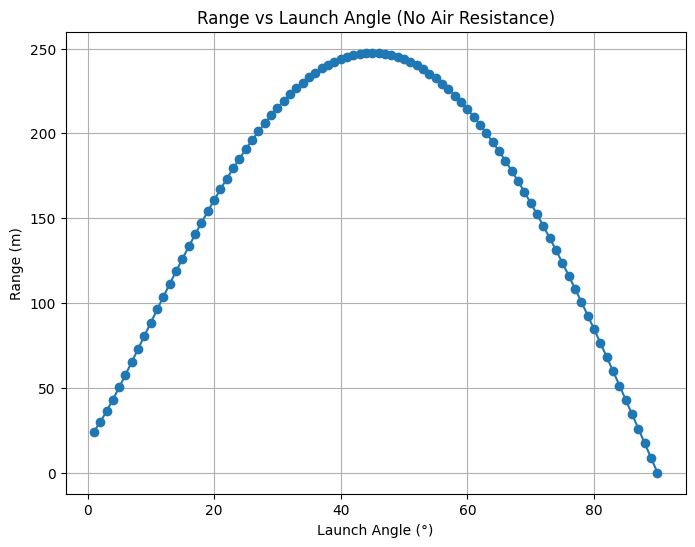

Optimal launch angle for maximum range (no air resistance):
Max Range: 247.528 m at 45°
Time of flight at optimal angle: 7.115 s


In [4]:

angles = np.arange(1, 91, 1)  # angles from 1° to 90°
ranges = []
flight_times = []

for ang in angles:
    t_arr, x_arr, y_arr, vx_arr, vy_arr = simulate_projectile_leapfrog(ang, drag=False, dt=dt, mass=mass, v0=v0)
    ranges.append(x_arr[-1])
    flight_times.append(t_arr[-1])
    
ranges = np.array(ranges)
flight_times = np.array(flight_times)

plt.figure(figsize=(8, 6))
plt.plot(angles, ranges, marker='o')
plt.xlabel("Launch Angle (°)")
plt.ylabel("Range (m)")
plt.title("Range vs Launch Angle (No Air Resistance)")
plt.grid(True)
plt.show()

max_range = np.max(ranges)
max_index = np.argmax(ranges)
optimal_angle = angles[max_index]
optimal_flight_time = flight_times[max_index]

print("Optimal launch angle for maximum range (no air resistance):")
print(f"Max Range: {max_range:.3f} m at {optimal_angle}°")
print(f"Time of flight at optimal angle: {optimal_flight_time:.3f} s")



## 4. Simulation with Linear Air Resistance at 29°
Now we simulate the projectile motion for a 29° launch while including linear air resistance.
The drag coefficient is computed as:
\[
C = 0.000155 D,
\]
with \(D = 0.074/{m}).

Both the flight time and range are printed and the trajectory is plotted.



Simulation with linear air resistance at 29°:
Time of flight: 4.874 s
Range: 206.948 m


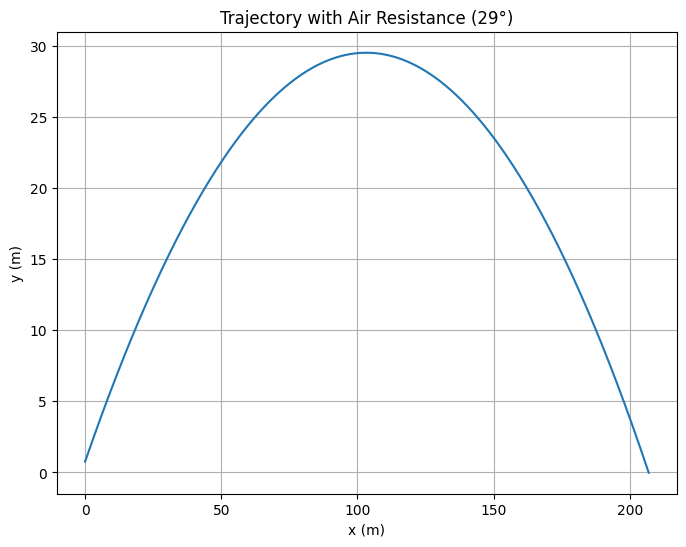

In [5]:

# Baseball diameter and drag coefficient
D = 0.074            # diameter in meters
C = 0.011 * D     # drag coefficient

# Simulation with air resistance at 29°
t_drag, x_drag, y_drag, vx_drag, vy_drag = simulate_projectile_leapfrog(29, drag=True, C=C, dt=dt, mass=mass, v0=v0)
flight_time_drag = t_drag[-1]
range_drag = x_drag[-1]

print("Simulation with linear air resistance at 29°:")
print(f"Time of flight: {flight_time_drag:.3f} s")
print(f"Range: {range_drag:.3f} m")

plt.figure(figsize=(8,6))
plt.plot(x_drag, y_drag)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Trajectory with Air Resistance (29°)")
plt.grid(True)
plt.show()


In [6]:
0.5*0.3*1.3*0.0042/.074

0.011067567567567568

In [7]:

def acceleration_quad(v, C2):
    """
    Compute the acceleration vector for quadratic drag.
    
    Parameters:
        v : array_like, shape(2,)
            Velocity vector [v_x, v_y].
        C2 : float
            Quadratic drag coefficient (already divided by mass).
            
    Returns:
        a : numpy array, shape(2,)
            Acceleration vector [a_x, a_y] where the x–component includes drag 
            and the y–component includes both gravity and drag.
    """
    speed = np.linalg.norm(v)
    a_x = -C2 * speed * v[0]
    a_y = -g - C2 * speed * v[1]
    return np.array([a_x, a_y])

def simulate_projectile_leapfrog_quad(angle_deg, C2, dt=0.001, mass=0.148, v0=49.2):
    """
    
    Parameters:
        angle_deg : float
            Launch angle in degrees.
        C2 : float
            Quadratic drag coefficient (divided by mass).
        dt : float
            Time step.
        mass : float
            Mass of the projectile.
        v0 : float
            Initial speed.
    
    Returns:
        t_arr, x_arr, y_arr, vx_arr, vy_arr : numpy arrays
            Arrays of time, x–position, y–position, x–velocity, and y–velocity until the projectile hits the ground.
    """
    angle_rad = math.radians(angle_deg)
    pos = np.array([x0, y0])
    vel = np.array([v0 * math.cos(angle_rad), v0 * math.sin(angle_rad)])
    a = acceleration_quad(vel, C2)
    
    t_list = [0.0]
    x_list = [pos[0]]
    y_list = [pos[1]]
    vx_list = [vel[0]]
    vy_list = [vel[1]]
    
    t = 0.0
    while pos[1] >= 0:
         pos_new = pos + vel * dt + 0.5 * a * dt**2
         a_new = acceleration_quad(vel, C2)
         vel_new = vel + 0.5 * (a + a_new) * dt
         t += dt
         t_list.append(t)
         x_list.append(pos_new[0])
         y_list.append(pos_new[1])
         vx_list.append(vel_new[0])
         vy_list.append(vel_new[1])
         pos = pos_new
         vel = vel_new
         a = a_new
         
    return np.array(t_list), np.array(x_list), np.array(y_list), np.array(vx_list), np.array(vy_list)



"""
## Range vs Launch Angle with Quadratic Drag

We now use the quadratic–drag simulation to compute the range as a function of launch angle from 1° to 90°. 



Baseline quadratic drag coefficient, C2: 0.00481


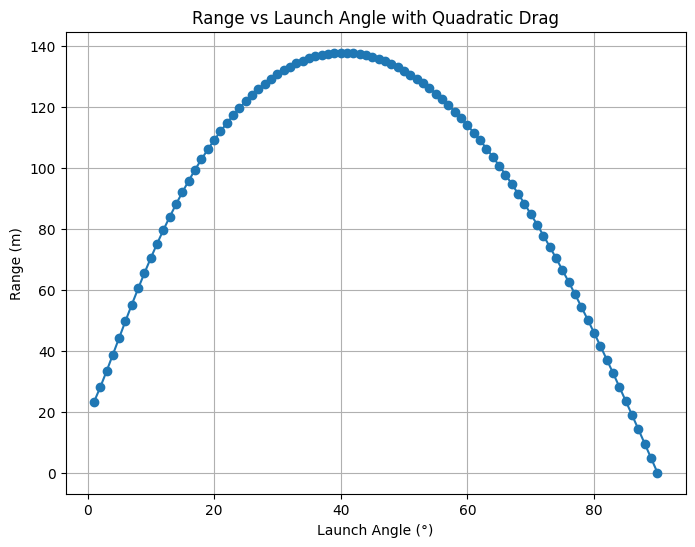

In [8]:

# Define baseball diameter and compute baseline quadratic drag coefficient
D = 0.074
C2_base = 0.13 * D**2 / mass
print(f"Baseline quadratic drag coefficient, C2: {C2_base:.5f}")

# Compute range as a function of launch angle with quadratic drag
angles = np.arange(1, 91, 1)  # angles from 1° to 90°
ranges_quad = []
for ang in angles:
    t_arr, x_arr, y_arr, vx_arr, vy_arr = simulate_projectile_leapfrog_quad(ang, C2_base, dt=dt, mass=mass, v0=v0)
    ranges_quad.append(x_arr[-1])
ranges_quad = np.array(ranges_quad)

plt.figure(figsize=(8,6))
plt.plot(angles, ranges_quad, marker='o')
plt.xlabel("Launch Angle (°)")
plt.ylabel("Range (m)")
plt.title("Range vs Launch Angle with Quadratic Drag")
plt.grid(True)
plt.show()


In [9]:

# Simulate the 28° launch with quadratic drag using the baseline C2
t_28, x_28, y_28, vx_28, vy_28 = simulate_projectile_leapfrog_quad(28, C2_base, dt=dt, mass=mass, v0=v0)
range_28 = x_28[-1]
print(f"Quadratic drag simulation at 28° with baseline C2 gives a range of {range_28:.2f} m")


Quadratic drag simulation at 28° with baseline C2 gives a range of 127.54 m


In [10]:

def range_for_C2(C2, angle_deg=28, dt=dt, mass=mass, v0=v0):
    """Return the computed range for a given C2 at a specified launch angle."""
    t_arr, x_arr, y_arr, vx_arr, vy_arr = simulate_projectile_leapfrog_quad(angle_deg, C2, dt=dt, mass=mass, v0=v0)
    return x_arr[-1]

# Target ranges (in meters)
target_range_normal = 121.9
target_range_coors  = 128.1

# Grid search for C2 for normal conditions
C2_values = np.linspace(0.000, 0.01, 200)
range_values = np.array([range_for_C2(C2_val) for C2_val in C2_values])
index_normal = np.argmin(np.abs(range_values - target_range_normal))
C2_normal = C2_values[index_normal]
range_normal = range_for_C2(C2_normal)

print(f"To match a typical home run of {target_range_normal:.1f} m, the required C2 is approximately {C2_normal:.5f} (yielding range {range_normal:.2f} m).")

# Grid search for Coors Field conditions
range_values_coors = np.array([range_for_C2(C2_val) for C2_val in C2_values])
index_coors = np.argmin(np.abs(range_values_coors - target_range_coors))
C2_coors = C2_values[index_coors]
range_coors = range_for_C2(C2_coors)

print(f"At Coors Field (average home run = {target_range_coors:.1f} m), the required C2 is approximately {C2_coors:.5f} (yielding range {range_coors:.2f} m).")


To match a typical home run of 121.9 m, the required C2 is approximately 0.00548 (yielding range 121.71 m).
At Coors Field (average home run = 128.1 m), the required C2 is approximately 0.00477 (yielding range 127.87 m).
